In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Creating dataframe from CSV
data = pd.read_csv('/content/Heart_Disease_Prediction.csv')

In [ ]:
data.head(5)

Age  Sex  Chest pain type   BP  Cholesterol  EKG results  Max HR  \
0   70    1                4  130          322            2     109   
1   67    0                3  115          564            2     160   
2   57    1                2  124          261            0     141   
3   64    1                4  128          263            0     105   
4   74    0                2  120          269            2     121   

   Exercise angina  ST depression  Slope of ST  Number of vessels fluro  \
0                0            2.4            2                        3   
1                0            1.6            2                        0   
2                0            0.3            1                        0   
3                1            0.2            2                        1   
4                1            0.2            1                        1   

  Heart Disease  
0      Presence  
1       Absence  
2      Presence  
3       Absence  
4       Absence

In [ ]:
#checking for the null values
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Heart Disease              0
dtype: int64

In [ ]:
data.drop(columns=['Slope of ST'], inplace=True)

In [ ]:
data.shape

(270, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   EKG results              270 non-null    int64  
 6   Max HR                   270 non-null    int64  
 7   Exercise angina          270 non-null    int64  
 8   ST depression            270 non-null    float64
 9   Number of vessels fluro  270 non-null    int64  
 10  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(9), object(1)
memory usage: 23.3+ KB


In [ ]:
data.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'EKG results',
       'Max HR', 'Exercise angina', 'ST depression', 'Number of vessels fluro',
       'Heart Disease'],
      dtype='object')

# **EXPLORATORY DATA ANALYSIS**

                              Age       Sex  Chest pain type        BP  \
Age                      1.000000 -0.094401         0.096920  0.273053   
Sex                     -0.094401  1.000000         0.034636 -0.062693   
Chest pain type          0.096920  0.034636         1.000000 -0.043196   
BP                       0.273053 -0.062693        -0.043196  1.000000   
Cholesterol              0.220056 -0.201647         0.090465  0.173019   
EKG results              0.128171  0.039253         0.074325  0.116157   
Max HR                  -0.402215 -0.076101        -0.317682 -0.039136   
Exercise angina          0.098297  0.180022         0.353160  0.082793   
ST depression            0.194234  0.097412         0.167244  0.222800   
Number of vessels fluro  0.356081  0.086830         0.225890  0.085697   

                         Cholesterol  EKG results    Max HR  Exercise angina  \
Age                         0.220056     0.128171 -0.402215         0.098297   
Sex                      

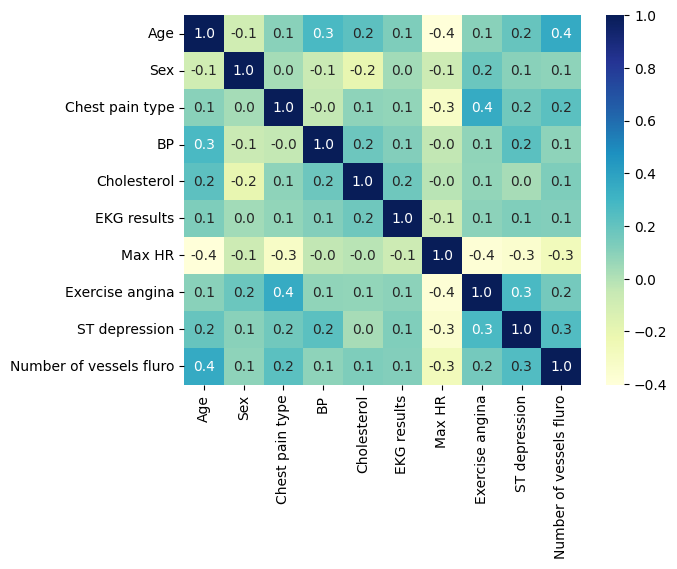

In [ ]:
#Checking correlation of features with the target variable using heatmap
print(data.corr())
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, fmt=".1f")
plt.show()


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Heart_Disease'] = label_encoder.fit_transform(data['Heart Disease'])
data['Heart_Disease'].unique

<bound method Series.unique of 0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart_Disease, Length: 270, dtype: int64>

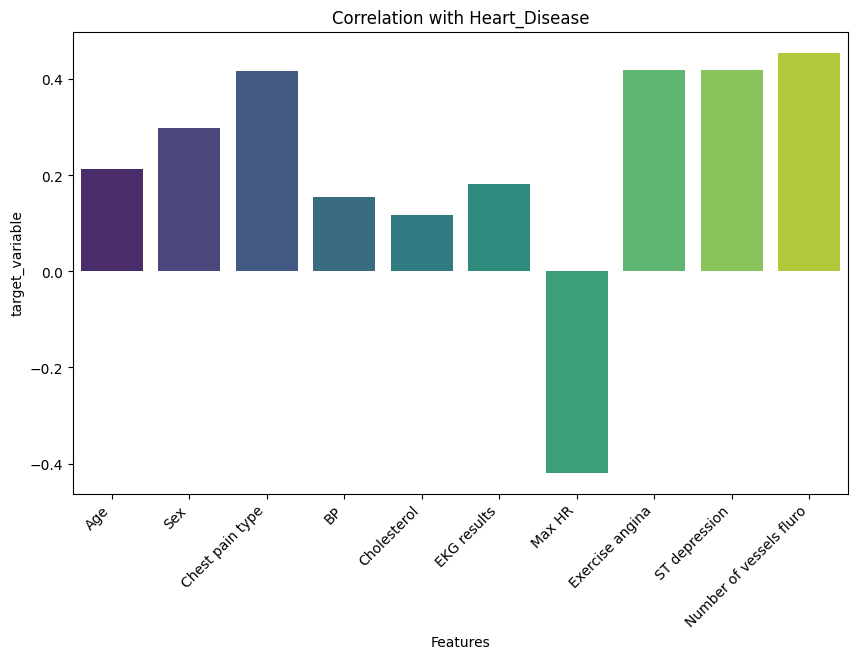

In [ ]:
target_variable = 'Heart_Disease'
feature_variable = ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'EKG results',
       'Max HR', 'Exercise angina', 'ST depression', 'Number of vessels fluro']

correlation_matrix = data.corr()
target_correlations = correlation_matrix[target_variable].drop(target_variable)

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=target_correlations.index, y=target_correlations.values, palette="viridis")
plt.title(f'Correlation with {target_variable}')
plt.xlabel('Features')
plt.ylabel('target_variable')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
data.head(5)

Age  Sex  Chest pain type   BP  Cholesterol  EKG results  Max HR  \
0   70    1                4  130          322            2     109   
1   67    0                3  115          564            2     160   
2   57    1                2  124          261            0     141   
3   64    1                4  128          263            0     105   
4   74    0                2  120          269            2     121   

   Exercise angina  ST depression  Number of vessels fluro Heart Disease  \
0                0            2.4                        3      Presence   
1                0            1.6                        0       Absence   
2                0            0.3                        0      Presence   
3                1            0.2                        1       Absence   
4                1            0.2                        1       Absence   

   Heart_Disease  
0              1  
1              0  
2              1  
3              0  
4              0

In [ ]:
data.drop(columns=['Heart Disease'], inplace=True)

In [ ]:
data.head(3)

Age  Sex  Chest pain type   BP  Cholesterol  EKG results  Max HR  \
0   70    1                4  130          322            2     109   
1   67    0                3  115          564            2     160   
2   57    1                2  124          261            0     141   

   Exercise angina  ST depression  Number of vessels fluro  Heart_Disease  
0                0            2.4                        3              1  
1                0            1.6                        0              0  
2                0            0.3                        0              1

## Machine learning Modeling

Fisrt making the training and testing data to train our model in the ratio of 80:20.

In [ ]:
#splitting data into feature and target
X = data.drop('Heart_Disease',axis=1)
y = data['Heart_Disease']

In [ ]:
from sklearn.model_selection import train_test_split

# split into 80:20 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

# describes info about train and test set
print("Heart_Disease X_train dataset: ", X_train.shape)
print("Heart_Disease y_train dataset: ", y_train.shape)
print("Heart_Disease X_test dataset: ", X_test.shape)
print("Heart_Disease y_test dataset: ", y_test.shape)

Heart_Disease X_train dataset:  (216, 10)
Heart_Disease y_train dataset:  (216,)
Heart_Disease X_test dataset:  (54, 10)
Heart_Disease y_test dataset:  (54,)


In [ ]:
data['Heart_Disease'].value_counts()

0    150
1    120
Name: Heart_Disease, dtype: int64

In [ ]:
X

Age  Sex  Chest pain type   BP  Cholesterol  EKG results  Max HR  \
0     70    1                4  130          322            2     109   
1     67    0                3  115          564            2     160   
2     57    1                2  124          261            0     141   
3     64    1                4  128          263            0     105   
4     74    0                2  120          269            2     121   
..   ...  ...              ...  ...          ...          ...     ...   
265   52    1                3  172          199            0     162   
266   44    1                2  120          263            0     173   
267   56    0                2  140          294            2     153   
268   57    1                4  140          192            0     148   
269   67    1                4  160          286            2     108   

     Exercise angina  ST depression  Number of vessels fluro  
0                  0            2.4                        3  
1                  0            1.6                        0  
2                  0            0.3                        0  
3                  1            0.2                        1  
4                  1            0.2                        1  
..               ...            ...                      ...  
265                0            0.5                        0  
266                0            0.0                        0  
267                0            1.3                        0  
268                0            0.4                        0  
269                1            1.5                        3  

[270 rows x 10 columns]

In [ ]:
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart_Disease, Length: 270, dtype: int64



**1.   Logistic Regression**



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_lr)
roc_auc_logistic = roc_auc_score(y_test, y_pred_lr)

print("Accuracy (Logistic Regression):", accuracy_logistic)
print("AUC-ROC (Logistic Regression):", roc_auc_logistic)

Accuracy (Logistic Regression): 0.7222222222222222
AUC-ROC (Logistic Regression): 0.7075736325385694


In [ ]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.1, 0.5, 1.0, 1.5],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

# Create GridSearchCV object with accuracy and AUC-ROC as scoring metrics
grid_search = GridSearchCV(clf_lr, param_grid, cv=5, scoring={'accuracy': 'accuracy', 'roc_auc': 'roc_auc'},
                           refit='roc_auc', verbose=1, n_jobs=-1)
roc_auc_logistic_2 = roc_auc_score(y_test, y_pred_lr)
# Fit the model to the data
grid_search.fit(X_train, y_train)
# Print the best parameters and the corresponding metrics
print("Best parameters for Logistic Regression: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))
print("AUC-ROC (Logistic Regression):", roc_auc_logistic_2)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters for Logistic Regression:  {'C': 0.1, 'penalty': None, 'solver': 'newton-cg'}
Best cross-validation accuracy: 0.93
AUC-ROC (Logistic Regression): 0.7075736325385694


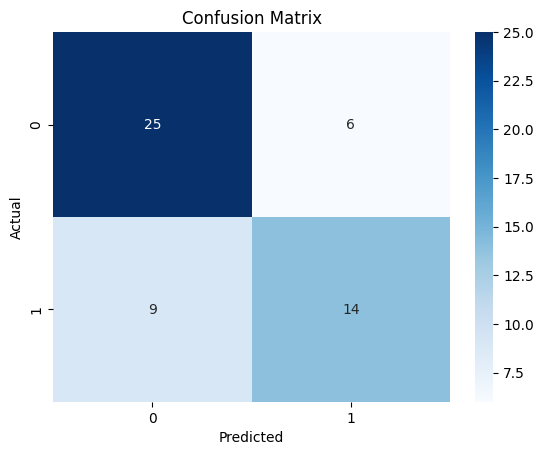

In [ ]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix using seaborn heatmap
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

2. **Decision Tree**

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)
accuracy_decision = accuracy_score(y_test, y_pred_DT)
roc_auc_decision = roc_auc_score(y_test, y_pred_DT)

print("Accuracy (Decision Tree):", accuracy_decision)
print("AUC-ROC (Decision Tree):", roc_auc_decision)

Accuracy (Decision Tree): 0.7407407407407407
AUC-ROC (Decision Tree): 0.7405329593267882


In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 6, 9, 12],
    'splitter' : ['best', 'random'],
    'max_features' : [None, 'auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object with accuracy and AUC-ROC as scoring metrics
grid_search = GridSearchCV(DT, param_grid, cv=5, scoring={'accuracy': 'accuracy', 'roc_auc': 'roc_auc'},
                           refit='roc_auc', verbose=1, n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)
roc_auc_decision_2 = roc_auc_score(y_test, y_pred_DT)

# Print the best parameters and the corresponding metrics
print("Best parameters for Decision Tree: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))
print("AUC-ROC (Decision Tree):", roc_auc_decision_2)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best parameters for Decision Tree:  {'criterion': 'log_loss', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Best cross-validation accuracy: 0.90
AUC-ROC (Decision Tree): 0.7405329593267882


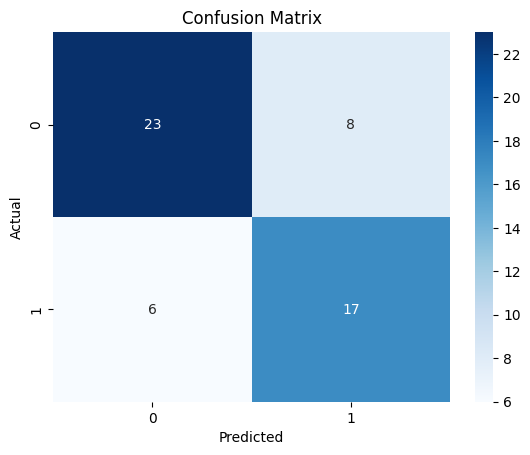

In [ ]:
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_DT)

# Plot confusion matrix using seaborn heatmap
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**3. Random Forest**

In [ ]:
clf_RF = RandomForestClassifier()
clf_RF.fit(X_train, y_train)
y_pred_RF = clf_RF.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_RF)
roc_auc_random = roc_auc_score(y_test, y_pred_RF)

print("Accuracy (Random Forest):", accuracy_random)
print("AUC-ROC (Random Forest):", roc_auc_random)

Accuracy (Random Forest): 0.7222222222222222
AUC-ROC (Random Forest): 0.7019635343618513


In [ ]:
param_grid = {
    'n_estimators': [25, 50, 75, 100],
    'max_depth': [3, 6, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' : ['gini', 'entropy', 'log_loss']

}

# Create GridSearchCV object with accuracy and AUC-ROC as scoring metrics
grid_search = GridSearchCV(clf_RF, param_grid, cv=5, scoring={'accuracy': 'accuracy', 'roc_auc': 'roc_auc'},
                           refit='roc_auc', verbose=1, n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)
roc_auc_random_2 = roc_auc_score(y_test, y_pred_RF)

# Print the best parameters and the corresponding metrics
print("Best parameters for Random Forest: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))
print("AUC-ROC (Random Forest):", roc_auc_random_2)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best parameters for Random Forest:  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 25}
Best cross-validation accuracy: 0.94
AUC-ROC (Random Forest): 0.7019635343618513


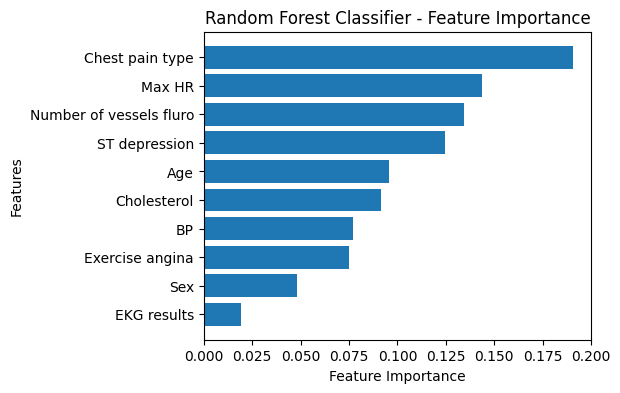

In [ ]:
feature_importances = clf_RF.feature_importances_

# Feature names (replace with your actual feature names)
Features = ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'EKG results',
            'Max HR', 'Exercise angina', 'ST depression', 'Number of vessels fluro',
            'Heart Disease']

# Sorting the indices of features by their importance
indices = np.argsort(feature_importances)

# Plotting the feature importances
plt.figure(figsize=(5, 4))
plt.barh(range(X.shape[1]), feature_importances[indices], align="center")
plt.yticks(range(X.shape[1]), [Features[i] for i in indices])  # Using the feature names directly
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Classifier - Feature Importance")
plt.show()

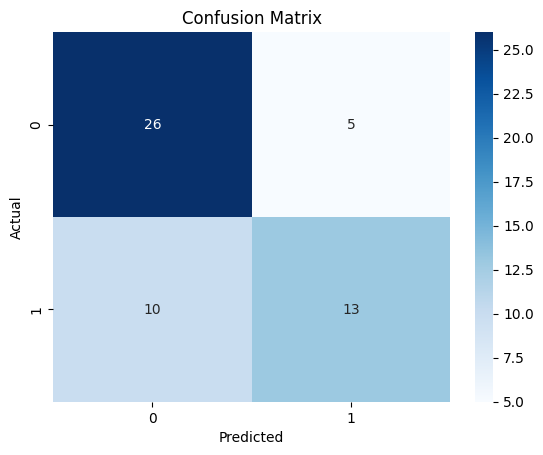

In [ ]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_RF)

# Plot confusion matrix using seaborn heatmap
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**4. XG Booster**

In [ ]:
clf_XGB = XGBClassifier()
clf_XGB.fit(X_train, y_train)
y_pred_XGB = clf_XGB.predict(X_test)
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)
roc_auc_XGB = roc_auc_score(y_test, y_pred_XGB)

print("Accuracy (XGBoost):", accuracy_XGB)
print("AUC-ROC (XGBoost):", roc_auc_XGB)

Accuracy (XGBoost): 0.7962962962962963
AUC-ROC (XGBoost): 0.7945301542776997


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'booster' : ['gbtree', 'gblinear', 'dart']
}

# Create GridSearchCV object with accuracy and AUC-ROC as scoring metrics
grid_search = GridSearchCV(clf_XGB, param_grid, cv=5, scoring={'accuracy': 'accuracy', 'roc_auc': 'roc_auc'},
                           refit='roc_auc', verbose=1, n_jobs=-1)
roc_auc_XGB_2 = roc_auc_score(y_test, y_pred_XGB)
# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding metrics
print("Best parameters for XGBoost: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))
print("AUC-ROC (XGBoost):", roc_auc_XGB_2)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters for XGBoost:  {'booster': 'gbtree', 'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validation accuracy: 0.93
AUC-ROC (XGBoost): 0.7945301542776997


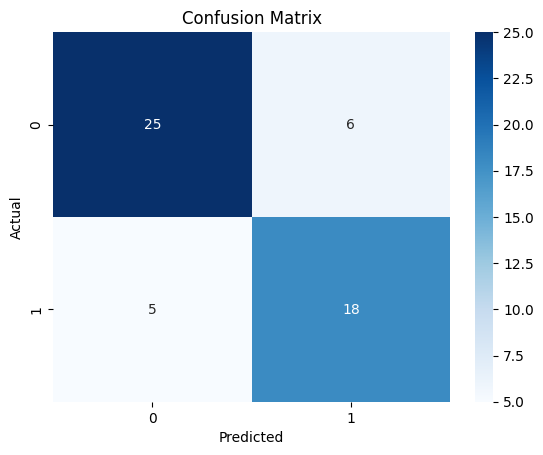

In [ ]:
from sklearn.metrics import confusion_matrix
cm_xgb = confusion_matrix(y_test, y_pred_XGB)

# Plot confusion matrix using seaborn heatmap
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

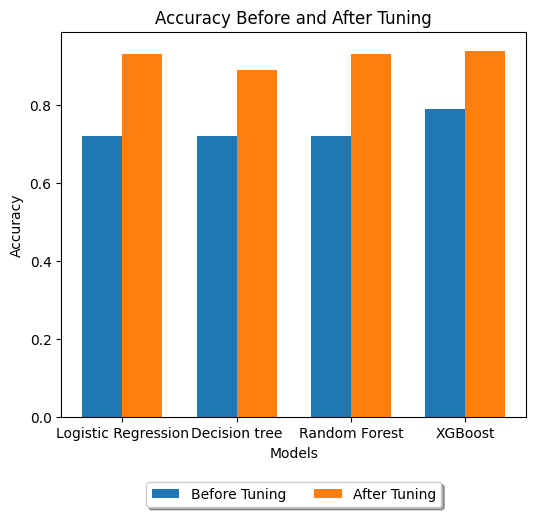

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace this with your actual data)
models = ['Logistic Regression', 'Decision tree', 'Random Forest', 'XGBoost']
accuracy_before_tuning = [0.72, 0.72 ,0.72, 0.79]
accuracy_after_tuning = [0.93, 0.89, 0.93, 0.94]

# Set up the bar chart
bar_width = 0.35
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(6, 5))

# Plot the bars
bar1 = ax.bar(index - bar_width / 2, accuracy_before_tuning, bar_width, label='Before Tuning')
bar2 = ax.bar(index + bar_width / 2, accuracy_after_tuning, bar_width, label='After Tuning')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Before and After Tuning')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

# Display the bar chart
plt.show()

In [ ]:
!pip install eli5 lime shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 10.5 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=36b866586363c1444f33a392c9f6db51dc2776b47e997f5fae4514787eab360c
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=0637670876542ec57eca674b104ab903a60d8d62456aca7864fd36ed0085b186
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built eli5 lime


## Interpretability and explainability

ELI5 is a python package that is used to inspect ML classifiers and explain their predictions. It is popularly used to debug algorithms such as sklearn regressors and classifiers, XGBoost, CatBoost, Keras, etc.

In [ ]:
import eli5

In [ ]:
X_test.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'EKG results',
       'Max HR', 'Exercise angina', 'ST depression',
       'Number of vessels fluro'],
      dtype='object')

In [ ]:
feature_names= ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'EKG results',
       'Max HR', 'Exercise angina', 'ST depression',
       'Number of vessels fluro']

Here, this is eli5 for Logistic regression:

In [ ]:
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(clf_lr, random_state=1).fit(X_test, y_test)

# display weights using PermutationImportance object
eli5.show_weights(perm, feature_names = feature_names)

In [ ]:
pos_entry = data[data['Heart_Disease'] == 1 ].drop(columns = ["Heart_Disease"], axis = 1)[0:1]
neg_entry = data[data['Heart_Disease'] == 0 ].drop(columns = ["Heart_Disease"], axis = 1)[173:174]

In [ ]:
# Positive Label
eli5.show_prediction(clf_lr, pos_entry,feature_names = feature_names )

Here, this is eli5 for Decision Tree.

In [ ]:
# Step 1: Feature Importance
# Calculate feature importance
feature_names = X_test.columns.tolist()
feature_importance = eli5.explain_weights(DT, feature_names=feature_names)

# Display feature importance
print("Feature Importance:")
print(feature_importance)
eli5.explain_weights(DT, feature_names = feature_names)

Feature Importance:
Explanation(estimator='DecisionTreeClassifier()', description='\nDecision tree feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='decision tree', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Chest pain type', weight=0.30156804990037245, std=None, value=None), FeatureWeight(feature='Number of vessels fluro', weight=0.15142993064816937, std=None, value=None), FeatureWeight(feature='Age', weight=0.12686337576785023, std=None, value=None), FeatureWeight(feature='ST depression', weight=0.09586199208096913, std=None, value=None), FeatureWeight(feature='Max HR', weight=0.08261702777859754, std=None, value=None), FeatureWeight(feature='BP', weight=0.07958751417851048, std=None, value=None), FeatureWeight(feature='Cholesterol', weight=0.05828460718870491, std=None, value=None), FeatureWeight(feature='Sex', weight=0.05222325106237438, std=None, value=None), Feature

Explanation(estimator='DecisionTreeClassifier()', description='\nDecision tree feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='decision tree', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Chest pain type', weight=0.30156804990037245, std=None, value=None), FeatureWeight(feature='Number of vessels fluro', weight=0.15142993064816937, std=None, value=None), FeatureWeight(feature='Age', weight=0.12686337576785023, std=None, value=None), FeatureWeight(feature='ST depression', weight=0.09586199208096913, std=None, value=None), FeatureWeight(feature='Max HR', weight=0.08261702777859754, std=None, value=None), FeatureWeight(feature='BP', weight=0.07958751417851048, std=None, value=None), FeatureWeight(feature='Cholesterol', weight=0.05828460718870491, std=None, value=None), FeatureWeight(feature='Sex', weight=0.05222325106237438, std=None, value=None), FeatureWeight(feature='Exercise angina', weight=0.0515642513944515, std=None, value=None), FeatureWeight(feature='EKG results', weight=0.0, std=None, value=None)], remaining=0), decision_tree=TreeInfo(criterion='gini', tree=NodeInfo(id=0, is_leaf=False, value=[119.0, 97.0], value_ratio=[0.5509259259259259, 0.44907407407407407], impurity=0.49481310013717417, samples=216, sample_ratio=1.0, feature_name='Chest pain type', feature_id=2, threshold=3.5, left=NodeInfo(id=1, is_leaf=False, value=[89.0, 19.0], value_ratio=[0.8240740740740741, 0.17592592592592593], impurity=0.2899519890260631, samples=108, sample_ratio=0.5, feature_name='Age', feature_id=0, threshold=55.5, left=NodeInfo(id=2, is_leaf=False, value=[61.0, 2.0], value_ratio=[0.9682539682539683, 0.031746031746031744], impurity=0.06147644242882333, samples=63, sample_ratio=0.2916666666666667, feature_name='BP', feature_id=3, threshold=182.0, left=NodeInfo(id=3, is_leaf=False, value=[61.0, 1.0], value_ratio=[0.9838709677419355, 0.016129032258064516], impurity=0.031737773152965665, samples=62, sample_ratio=0.28703703703703703, feature_name='Number of vessels fluro', feature_id=9, threshold=2.0, left=NodeInfo(id=4, is_leaf=True, value=[60.0, 0.0], value_ratio=[1.0, 0.0], impurity=0.0, samples=60, sample_ratio=0.2777777777777778, feature_name=None, feature_id=None, threshold=None, left=None, right=None), right=NodeInfo(id=5, is_leaf=False, value=[1.0, 1.0], value_ratio=[0.5, 0.5], impurity=0.5, samples=2, sample_ratio=0.009259259259259259, feature_name='Max HR', feature_id=6, threshold=156.0, left=NodeInfo(id=6, is_leaf=True, value=[0.0, 1.0], value_ratio=[0.0, 1.0], impurity=0.0, samples=1, sample_ratio=0.004629629629629629, feature_name=None, feature_id=None, threshold=None, left=None, right=None), right=NodeInfo(id=7, is_leaf=True, value=[1.0, 0.0], value_ratio=[1.0, 0.0], impurity=0.0, samples=1, sample_ratio=0.004629629629629629, feature_name=None, feature_id=None, threshold=None, left=None, right=None))), right=NodeInfo(id=8, is_leaf=True, value=[0.0, 1.0], value_ratio=[0.0, 1.0], impurity=0.0, samples=1, sample_ratio=0.004629629629629629, feature_name=None, feature_id=None, threshold=None, left=None, right=None)), right=NodeInfo(id=9, is_leaf=False, value=[28.0, 17.0], value_ratio=[0.6222222222222222, 0.37777777777777777], impurity=0.47012345679012346, samples=45, sample_ratio=0.20833333333333334, feature_name='Sex', feature_id=1, threshold=0.5, left=NodeInfo(id=10, is_leaf=False, value=[16.0, 2.0], value_ratio=[0.8888888888888888, 0.1111111111111111], impurity=0.19753086419753085, samples=18, sample_ratio=0.08333333333333333, feature_name='Age', feature_id=0, threshold=62.5, left=NodeInfo(id=11, is_leaf=False, value=[5.0, 2.0], value_ratio=[0.7142857142857143, 0.2857142857142857], impurity=0.40816326530612246, samples=7, sample_ratio=0.032407407407407406, feature_name='Number of vessels fluro', feature_id=9, threshold=0.5, left=NodeInfo(id=12, is_leaf=True, value=[4.0, 0.0], value_ratio=[1.0, 0.0], impurity=0.0, samp

LIME ( Local Interpretable Model-agnostic Explanations )is a novel explanation technique that explains the prediction of any classifier in an interpretable and faithful manner by learning an interpretable model locally around the prediction.

Here, we are using LIME (Local Interpretable Model-agnostic Explanations) for Random Forest.

In [ ]:
import lime
import lime.lime_tabular
# LIME Explainer for RandomForest
rf_explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                     mode="classification",
                                                     #training_labels=y_train,
                                                     feature_names=X_train.columns)
# Explanation for RandomForest
rf_test_instance = X_test.iloc[0]
rf_rf_exp = rf_explainer.explain_instance(rf_test_instance.values, clf_RF.predict_proba)
rf_rf_exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
rf_rf_exp.score

0.5763524873741428

Here, we are using LIME (Local Interpretable Model-agnostic Explanations) for XGBooster.

In [ ]:
# LIME Explainer for XGBoost
xgb_explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                      mode="classification",
                                                      training_labels=y_train,
                                                      feature_names=data.columns,
                                                      class_names=[0, 1],
                                                      kernel_width=5)
# Explanation for XGBoost
xgb_test_instance = X_test.iloc[0]
rf_xgb_exp = xgb_explainer.explain_instance(xgb_test_instance.values, clf_XGB.predict_proba)
rf_xgb_exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
rf_xgb_exp.score

0.5310610799735128

SHAP (SHapley Additive exPlanations) is a framework in machine learning for understanding the output of machine learning models. It is based on Shapley values, a concept from cooperative game theory, and it provides a way to fairly distribute a value among a group of contributors.

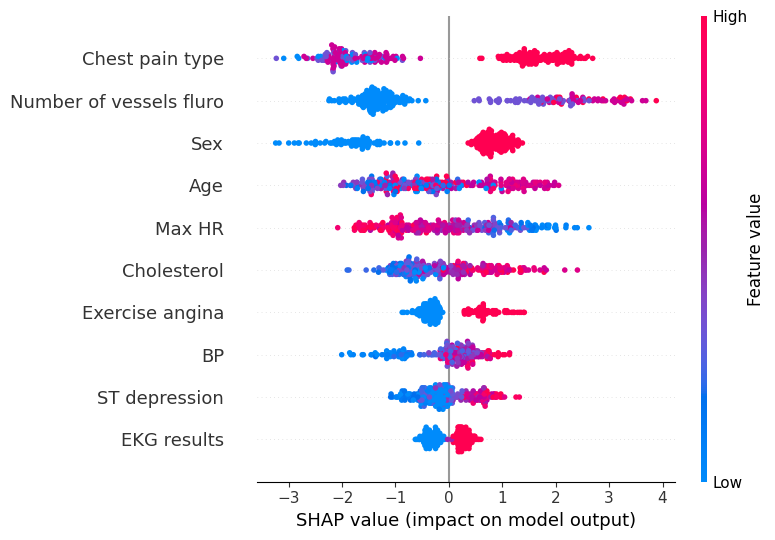

In [ ]:
# prompt: Use SHAP library to interpret the XGBoost model – specifically, TreeExplainer. This method of SHAP, TreeExplainer, is optimized for tree-based models.  Visualize your explanations, one for positive and one for negative, using the  ‘force_plot’ function.  Note; You need to establish a ‘base value’ in order to be used by ‘force_plot’. The  explainer.expected_value is the ‘base value’.  Create the feature importance plot by calling SHAP’s ‘summary_plot’ function,  for each class / label.

import shap
shap.initjs()
explainer = shap.TreeExplainer(clf_XGB)
shap_values = explainer.shap_values(X)
# Create the feature importance plot
shap.summary_plot(shap_values, X)


In [ ]:
# Predict_probab for positive labels
prob_lr = clf_lr.predict_proba(pos_entry)
prob_dt = DT.predict_proba(pos_entry)
prob_rf = clf_RF.predict_proba(pos_entry)
prob_xgb = clf_XGB.predict_proba(pos_entry)
pos_compare_probab = pd.DataFrame({
  "Name": ["LR", "DT", "RF", "XGB"],
  "prob_F": [prob_lr[0][0], prob_dt[0][0], prob_rf[0][0],prob_xgb[0][0]],
  "prob_T": [prob_lr[0][1], prob_dt[0][1], prob_rf[0][1],prob_xgb[0][1]]
})
pos_compare_probab

Name    prob_F    prob_T
0   LR  0.001634  0.998366
1   DT  0.000000  1.000000
2   RF  0.260000  0.740000
3  XGB  0.011298  0.988702